Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white',color_codes=True)
import warnings
warnings.filterwarnings('ignore')

Loading the data

In [ ]:
data = pd.read_csv('C:\\Users\\jipso\\OneDrive\\Desktop\\CSV Files for Jupyter\\2015.csv')

Making a copy of the data and exploring the data features

In [ ]:
df=data.copy()
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Checking for null values

In [ ]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Checking for data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Plotting pairplot to see the relatioships

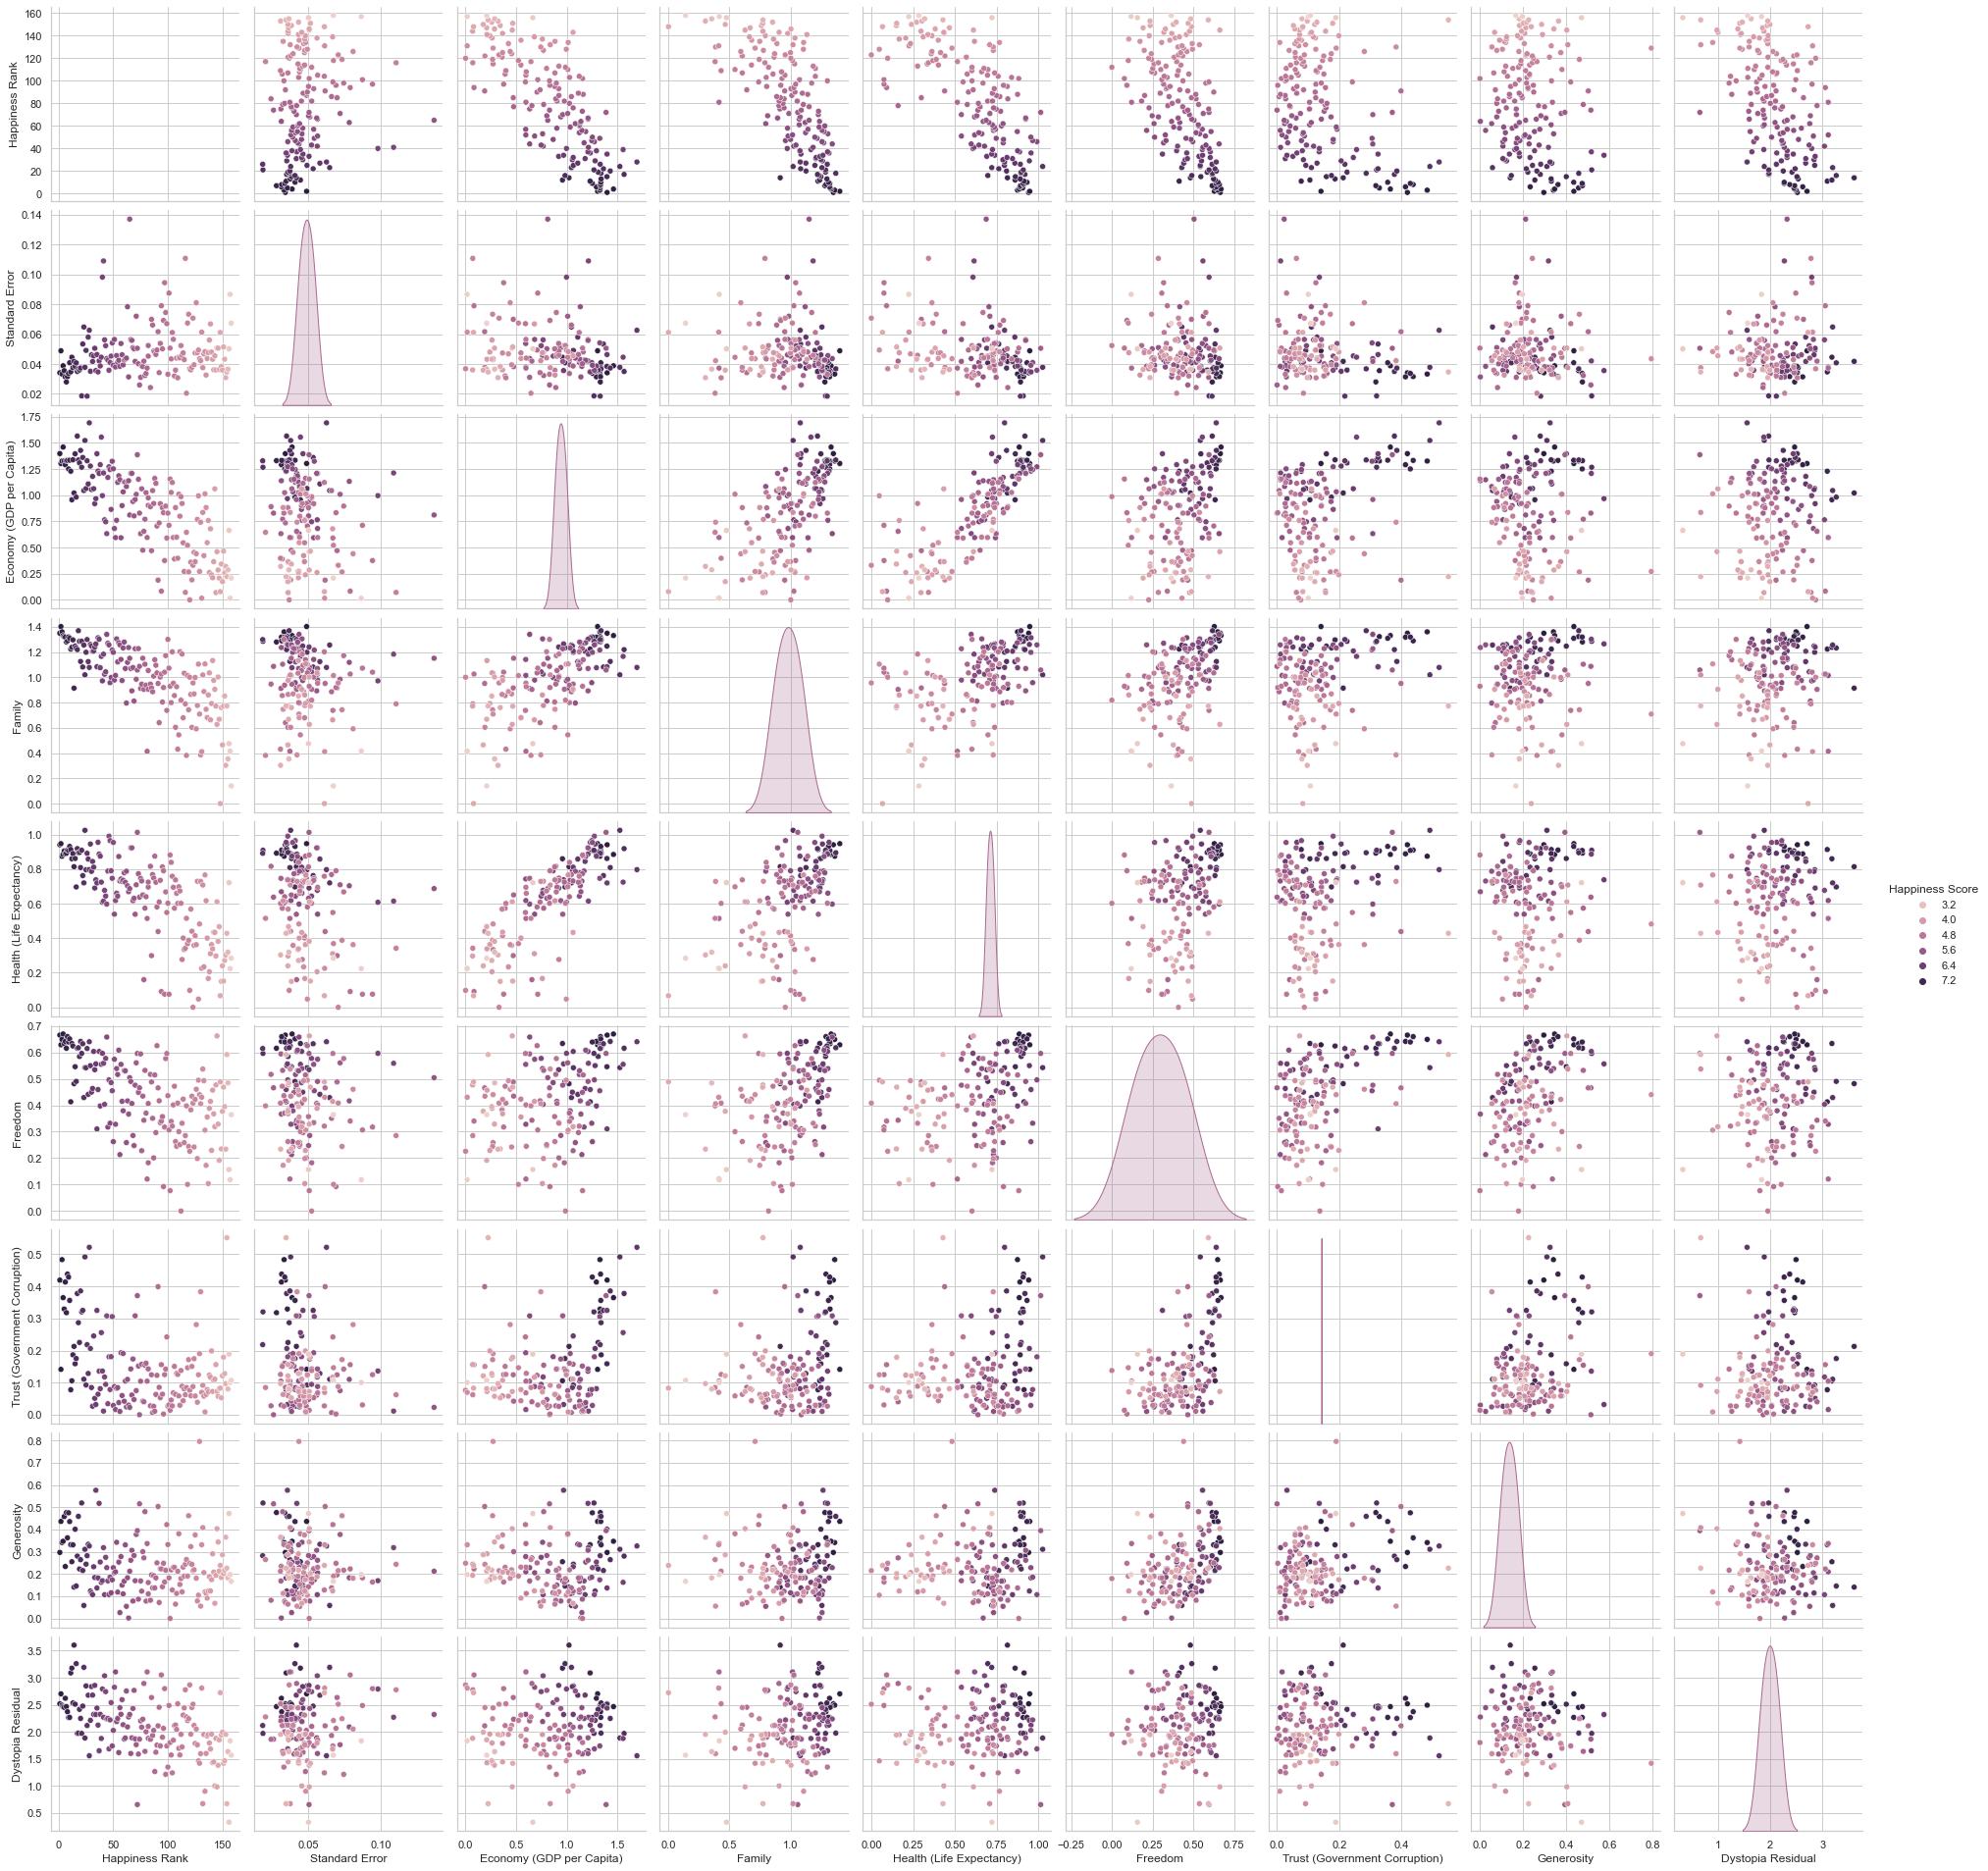

In [ ]:
sns.set_style('whitegrid');
sns.pairplot(df, hue='Happiness Score', size=3)
plt.show()

Plotting Correlation

<AxesSubplot:>

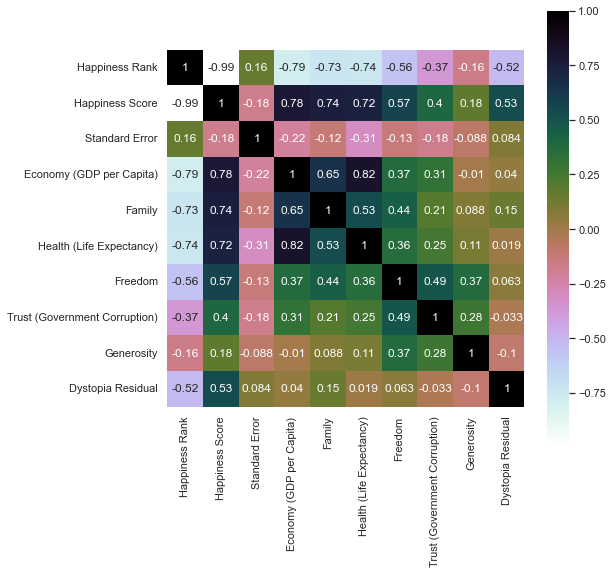

In [ ]:
corr = df.corr()

plt.figure(figsize = (8,8))
sns.heatmap(corr, annot=True, cmap = 'cubehelix_r', square=True)

Dropping columns that are not relevant

In [ ]:
df.drop(['Country'],axis=1,inplace=True)
df.drop(['Region'],axis=1,inplace=True)
df.drop(['Happiness Rank'],axis=1,inplace=True)
df.drop(['Standard Error'],axis=1,inplace=True)
df.drop(['Dystopia Residual'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Economy (GDP per Capita)       158 non-null    float64
 2   Family                         158 non-null    float64
 3   Health (Life Expectancy)       158 non-null    float64
 4   Freedom                        158 non-null    float64
 5   Trust (Government Corruption)  158 non-null    float64
 6   Generosity                     158 non-null    float64
dtypes: float64(7)
memory usage: 8.8 KB


Checking for outliers

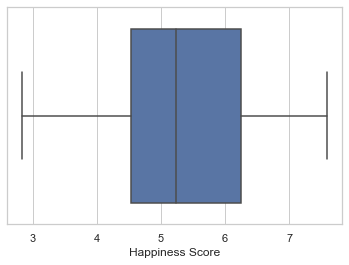

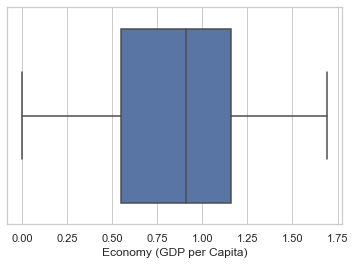

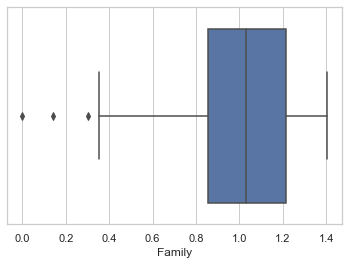

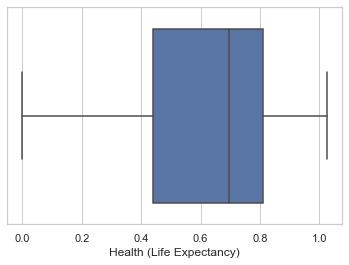

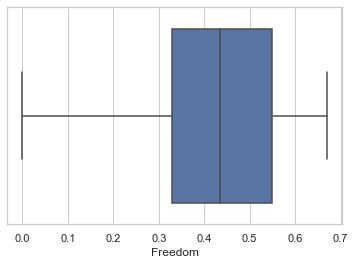

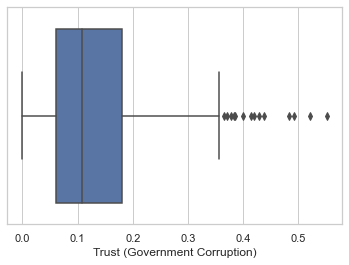

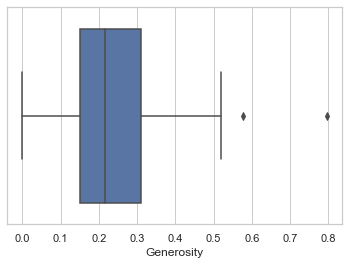

In [ ]:
cols=df.columns

for col in cols:
    sns.boxplot(df[col])
    plt.show()

Dealing with the outliers

In [ ]:
Q1=np.percentile(df["Family"],25,interpolation="midpoint")
Q3=np.percentile(df["Family"],75,interpolation="midpoint")
IQR=Q3-Q1
up_limit=Q3+1.5*IQR 
low_limit=Q1-1.5*IQR
print("Upper Limit:",up_limit)
print("Low Limit:", low_limit)

Upper Limit: 1.7444024999999999
Low Limit: 0.32618250000000004


<AxesSubplot:xlabel='Family'>

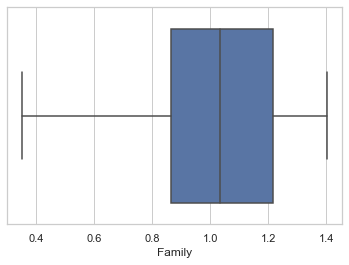

In [ ]:
df= df[df["Family"]<up_limit]    #applying the condition to 'df' to remove values of the outliers
df= df[df["Family"]>low_limit]   #applying the condition to 'df' to remove values of the outliers

sns.boxplot(df['Family'])

In [ ]:
Q1=np.percentile(df["Trust (Government Corruption)"],35,interpolation="midpoint")
Q3=np.percentile(df["Trust (Government Corruption)"],65,interpolation="midpoint")
IQR=Q3-Q1
up_limit=Q3+1.5*IQR 
low_limit=Q1-1.5*IQR
print("Upper Limit:",up_limit)
print("Low Limit:", low_limit)

Upper Limit: 0.25405750000000005
Low Limit: -0.027322500000000013


<AxesSubplot:xlabel='Trust (Government Corruption)'>

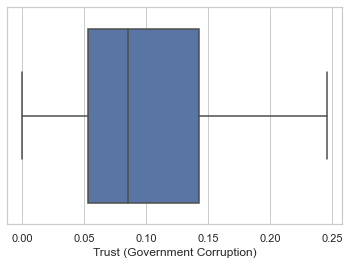

In [ ]:
df= df[df["Trust (Government Corruption)"]<up_limit]    #applying the condition to 'df' to remove values of the outliers
df= df[df["Trust (Government Corruption)"]>low_limit]   #applying the condition to 'df' to remove values of the outliers

sns.boxplot(df['Trust (Government Corruption)'])

In [ ]:
Q1=np.percentile(df["Generosity"],30,interpolation="midpoint")
Q3=np.percentile(df["Generosity"],70,interpolation="midpoint")
IQR=Q3-Q1
up_limit=Q3+1.5*IQR 
low_limit=Q1-1.5*IQR
print("Upper Limit:",up_limit)
print("Low Limit:", low_limit)

Upper Limit: 0.3981874999999999
Low Limit: 0.012407500000000043


<AxesSubplot:xlabel='Generosity'>

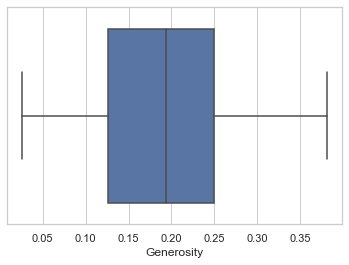

In [ ]:
df= df[df["Generosity"]<up_limit]    #applying the condition to 'df' to remove values of the outliers
df= df[df["Generosity"]>low_limit]   #applying the condition to 'df' to remove values of the outliers

sns.boxplot(df['Generosity'])

Splitting and Training Data

In [ ]:
x = df.drop(['Happiness Score'],axis=1)
y = df['Happiness Score']

In [ ]:
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
10,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172
11,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497
12,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088
13,1.02054,0.91451,0.81444,0.48181,0.21312,0.14074
15,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574
...,...,...,...,...,...,...
149,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657
150,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165
151,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260


In [ ]:
y.value_counts()

5.192    2
7.278    1
4.786    1
4.565    1
4.571    1
        ..
5.813    1
5.824    1
5.828    1
5.833    1
2.905    1
Name: Happiness Score, Length: 114, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.2)

In [ ]:
from sklearn.linear_model import LinearRegression

ln=LinearRegression()
ln.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=ln.predict(x_test)
print(y_pred)

[5.84973758 3.16935726 4.97240207 5.38927604 5.75536797 5.75800352
 5.85080343 5.37496975 3.79427676 5.93812637 4.24267498 5.21975812
 5.95815541 6.10330839 4.67239815 5.70275643 5.36195598 6.7359688
 6.60219851 4.6501519  5.16562162 4.38888115 5.93292631]


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

print('Mean Absolute Error of linear regression:',mean_absolute_error(y_pred, y_test))
print('Mean Square Error of linear regression:', mean_squared_error(y_pred, y_test))
print('R_Squared Score of linear regression:', r2_score(y_pred, y_test))

Mean Absolute Error of linear regression: 0.3768407430002294
Mean Square Error of linear regression: 0.23797758305126118
R_Squared Score of linear regression: 0.668848464262237


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

accuracy=ln.score(x_test,y_test)
print("Accuracy:",round(accuracy*100,2),"%")

Accuracy: 71.67 %
